In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm, TwoSlopeNorm
import datetime as dt
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature


### CAO index from ERA5 data

In [2]:
folder = "/home/eefjg/OneDrive/Leeds/PhD/Data/ERA5"
files = glob(folder + "/ERA5*.nc")


In [3]:
ds = xr.open_mfdataset(files, combine='by_coords')
ds

<xarray.Dataset>
Dimensions:    (longitude: 101, latitude: 101, time: 365)
Coordinates:
  * longitude  (longitude) float32 -65.0 -64.75 -64.5 ... -40.5 -40.25 -40.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 45.5 45.25 45.0
  * time       (time) datetime64[ns] 2022-01-01T16:00:00 ... 2022-12-31T16:00:00
Data variables:
    msl        (time, latitude, longitude) float32 dask.array<chunksize=(365, 101, 101), meta=np.ndarray>
    skt        (time, latitude, longitude) float32 dask.array<chunksize=(365, 101, 101), meta=np.ndarray>
    t          (time, latitude, longitude) float32 dask.array<chunksize=(365, 101, 101), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-20 14:55:23 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [4]:
# Calculate CAO index
# calculate surface theta
# calculate 800hPa theta

ds['theta_800'] = ds['t'] * (1000 / 800) ** 0.286
ds['theta_skt'] = ds['skt'] * (1000 / (ds['msl']/100)) ** 0.286
ds['cao'] = ds['theta_skt'] - ds['theta_800']
ds


<xarray.Dataset>
Dimensions:    (longitude: 101, latitude: 101, time: 365)
Coordinates:
  * longitude  (longitude) float32 -65.0 -64.75 -64.5 ... -40.5 -40.25 -40.0
  * latitude   (latitude) float32 70.0 69.75 69.5 69.25 ... 45.5 45.25 45.0
  * time       (time) datetime64[ns] 2022-01-01T16:00:00 ... 2022-12-31T16:00:00
Data variables:
    msl        (time, latitude, longitude) float32 dask.array<chunksize=(365, 101, 101), meta=np.ndarray>
    skt        (time, latitude, longitude) float32 dask.array<chunksize=(365, 101, 101), meta=np.ndarray>
    t          (time, latitude, longitude) float32 dask.array<chunksize=(365, 101, 101), meta=np.ndarray>
    theta_800  (time, latitude, longitude) float32 dask.array<chunksize=(365, 101, 101), meta=np.ndarray>
    theta_skt  (time, latitude, longitude) float32 dask.array<chunksize=(365, 101, 101), meta=np.ndarray>
    cao        (time, latitude, longitude) float32 dask.array<chunksize=(365, 101, 101), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-20 14:55:23 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

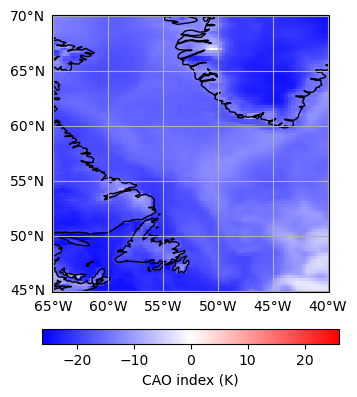

In [5]:
# No CAO example: 17th May
# Strong CAO example: 14th March


lon = ds.longitude
lat = ds.latitude
cao = ds.cao.sel(time=dt.datetime(2022, 5, 17, 16))

fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plot = ax.pcolormesh(lon, lat, cao,
                            cmap='bwr',
                            norm=CenteredNorm(),
                            transform=ccrs.PlateCarree()
                    )

cbar = plt.colorbar(plot, orientation='horizontal', pad=0.1, shrink=0.6)
cbar.set_label('CAO index (K)', fontsize=10)
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.show()